（1） 任意の多変量データを使い、クラスタリング（K-means）による可視化を行いなさい。<br>
（2） 任意の多変量データを使い、PCAを行いなさい。<br>
（3）山手線の駅名と緯度経度情報からなるデータを使い、MDSによる可視化を行いなさい。<br>


In [4]:
%pip install geopy

Note: you may need to restart the kernel to use updated packages.


/var/folders/r9/t7gwy3s16y755fy1xgff7v5r0000gn/T/ipykernel_73216/2699936303.py:65: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', k)


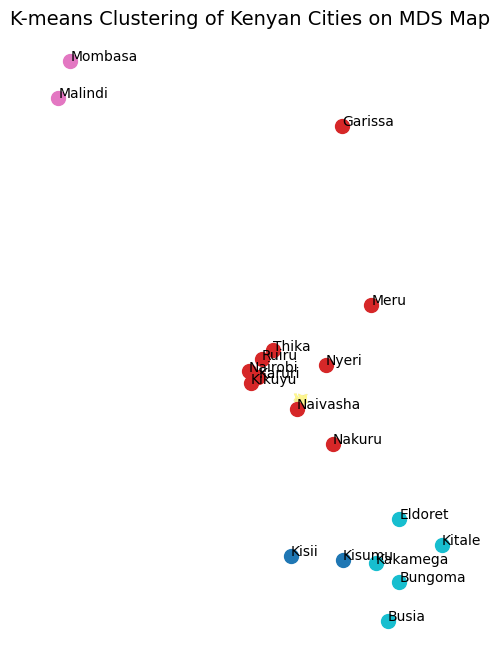

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from geopy.distance import geodesic

# 1. 都市と緯度経度の定義
locations = {
    'Nairobi': (-1.286389, 36.817223),
    'Mombasa': (-4.05466, 39.66359),
    'Kisumu': (-0.091702, 34.767956),
    'Nakuru': (-0.28333, 36.06667),
    'Eldoret': (0.52036, 35.26993),
    'Thika': (-1.033260, 37.069330),
    'Kakamega': (0.2841, 34.7523),
    'Kisii': (-0.680482, 34.777061),
    'Malindi': (-3.219186, 40.116890),
    'Garissa': (-0.452750, 39.646010),
    'Kitale': (1.015720, 35.006220),
    'Nyeri': (-0.420130, 36.947590),
    'Meru': (0.046260, 37.655870),
    'Busia': (0.460050, 34.111690),
    'Bungoma': (0.563500, 34.560550),
    'Naivasha': (-0.717178, 36.431026),
    'Kikuyu': (-1.254337, 36.681660),
    'Ruiru': (-1.146650, 36.960870),
    'Karuri': (-1.176000, 36.756000)
}

place_names = list(locations.keys())

# 2. 距離行列の計算
n = len(place_names)
dist_matrix = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        dist_matrix[i][j] = geodesic(locations[place_names[i]], locations[place_names[j]]).km

# 3. MDSによる2次元座標への変換
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
coords = mds.fit_transform(dist_matrix)

# 4. K-meansクラスタリングの適用
k = 4  # クラスタ数は適宜調整
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(coords)

# 5. スケーリング（地図画像に合わせる）
SCALE = 100
X_SHIFT = 1000
Y_SHIFT = 1000

x_scaled = -coords[:, 0] * SCALE + X_SHIFT
y_scaled = -coords[:, 1] * SCALE + Y_SHIFT

# 6. 地図画像の読み込み
img = mpimg.imread("KE_counties.png")  # 適切なケニアの地図画像を用意してください

# 7. 描画
plt.figure(figsize=(10, 8))
plt.imshow(img, extent=[0, 2000, 0, 2000])

# クラスタごとに色分けしてプロット
colors = plt.cm.get_cmap('tab10', k)
for i in range(n):
    plt.scatter(x_scaled[i], y_scaled[i], s=100, color=colors(labels[i]))
    plt.text(x_scaled[i]+8, y_scaled[i]+8, place_names[i], fontsize=10, color='black')

plt.title("K-means Clustering of Kenyan Cities on MDS Map", fontsize=14)
plt.axis('off')
plt.show()
